In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.grid_search import GridSearchCV

from pprint import pprint 

from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from random import seed
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier
from itertools import product
from collections import OrderedDict
from itertools import product

from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from __future__ import print_function # For Python 2 / 3 compatability
from sklearn.metrics import confusion_matrix
import itertools

from sklearn.decomposition import PCA

from sklearn import discriminant_analysis
from sklearn.neighbors import KNeighborsClassifier as KNN

import warnings
warnings.filterwarnings("ignore")

/Users/ThomasHsueh/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ThomasHsueh/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### Load prepared dataset

In [2]:
ADNI_merge = pd.read_csv('ADNIMERGE.csv')
ADNI2 = ADNI_merge[ADNI_merge['COLPROT']=='ADNI2']
print("ADNI2 shape: ", ADNI2.shape)

ADNI2_impute = pd.read_csv('ADNI2_mb_impute_v3.csv')
print("ADNI2_impute shape: ", ADNI2_impute.shape)

ADNI2_remove = pd.read_csv('ADNI2_remove_all_missing_v3.csv')
print("ADNI2_remove shape: ", ADNI2_remove.shape)

ADNI2 shape:  (6937, 94)
ADNI2_impute shape:  (789, 58)
ADNI2_remove shape:  (789, 13)


In [3]:
ADNI2_impute.columns

Index(['AGE', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl',
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_perc_forgetting_bl', 'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
       'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
       'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
       'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
       'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl',
       'AV45_bl', 'Years_bl', 'PTEDUCAT', 'PTGENDER_Female', 'PTGENDER_Male',
       'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
       'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_White', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Widowed', 'APOE4_0.0', 'APO

In [4]:
ADNI2_remove.columns

Index(['RID', 'PTID', 'SITE', 'COLPROT', 'ORIGPROT', 'DX_bl', 'AGE',
       'EXAMDATE_bl', 'CDRSB_bl', 'MMSE_bl', 'PTEDUCAT', 'Female', 'Male'],
      dtype='object')

#### Narrow down to baseline-only data, and prepare X_train, y_train, X_test, and y_test

In [5]:
DROP_COL_IMPUTE = ["Years_bl"]

DROP_COL_REMOVE = ['RID', 'PTID', 'SITE', 'COLPROT', 'ORIGPROT',
                   'EXAMDATE_bl']

df_impute = ADNI2_impute.drop(DROP_COL_IMPUTE, axis=1)
df_remove = ADNI2_remove.drop(DROP_COL_REMOVE, axis=1)
#df_impute['PTEDUCAT'] = ADNI2["PTEDUCAT"].values
#df_remove['PTEDUCAT'] = ADNI2["PTEDUCAT"].values
print(df_impute.shape)
print(df_remove.shape)
#print(df_impute.columns)
#print(df_remove.columns)

(789, 57)
(789, 7)


In [6]:
np.random.seed(9001)
train_percentage = 0.75
msk = np.random.rand(len(df_impute)) < train_percentage
impute_train = df_impute[msk]
impute_test  = df_impute[~msk]
remove_train = df_remove[msk]
remove_test  = df_remove[~msk]

X_train_remove = remove_train.drop("DX_bl", axis=1)
y_train_remove = remove_train["DX_bl"]
X_test_remove  = remove_test.drop("DX_bl", axis=1)
y_test_remove  = remove_test["DX_bl"]

X_train_impute = impute_train
y_train_impute = y_train_remove
X_test_impute = impute_test
y_test_impute = y_test_remove

print("For REMOVE:")
print(X_train_remove.shape)
print(y_train_remove.shape)
print(X_test_remove.shape)
print(y_test_remove.shape)

print("\nFor IMPUTE:")
print(X_train_impute.shape)
print(y_train_impute.shape)
print(X_test_impute.shape)
print(y_test_impute.shape)

For REMOVE:
(588, 6)
(588,)
(201, 6)
(201,)

For IMPUTE:
(588, 57)
(588,)
(201, 57)
(201,)


#### Running models on the remove-all-nan dataset

In [46]:
# CV Log Regression over the rest
log_ovr_remove = LogisticRegressionCV(Cs=10, cv = 5, multi_class='ovr')
log_ovr_remove.fit(X_train_remove, y_train_remove)

# CV Log Regression multinomila
log_multi_remove = LogisticRegressionCV(Cs=10, cv = 5, multi_class = 'multinomial')
log_multi_remove.fit(X_train_remove, y_train_remove)

#Linear discriminant analysis
LDA_remove = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_remove.fit(X_train_remove, y_train_remove)

#Quadratic discriminant analysis
QDA_remove = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA_remove.fit(X_train_remove, y_train_remove)

# CV k-nearest neighbour
knn = KNN()
param=np.arange(1,20)
param_grid = dict(n_neighbors=param)
gs = GridSearchCV(KNN(), param_grid, cv=5, n_jobs=2)
gs.fit(X_train_remove, y_train_remove)
knn_remove = gs.best_estimator_

#CV tree classifier
n_estimators =np.arange(1, 20)
param_grid = dict(max_depth=n_estimators)
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2)
gs.fit(X_train_remove, y_train_remove)
tree_remove = gs.best_estimator_

#CV Random forest
max_features = np.arange(1,len(X_train_remove.columns))              #number of predictors at ech split
max_depth = np.arange(1,20)                                   #max depth
rf = RandomForestClassifier(n_estimators=50, max_depth=None)
param_grid = dict(max_features=max_features)
gs = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
gs.fit(X_train_remove, y_train_remove)
rf_remove = gs.best_estimator_

#Adaboost
max_depth = np.arange(1,5)
numb_estimators = [10*x for x in range(1,10)]

param_grid = {'base_estimator__max_depth':max_depth,
              'n_estimators':numb_estimators}
DTC = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = DTC, learning_rate=.05)
gs = GridSearchCV(ada, param_grid, cv=5, n_jobs=2)
gs.fit(X_train_remove, y_train_remove)
ada_remove = gs.best_estimator_

# PCA
pca = PCA(n_components = X_train_remove.shape[1])
pca.fit(X_train_remove)
X_train_pca = pca.transform(X_train_remove)
var_ratio = pca.explained_variance_ratio_
pca_dict = {}
var_sum = 0
pca_counter = 0
for i in range(len(var_ratio)): 
    if var_sum < 0.9:
        pca_dict[('pc %d'%i)] = X_train_pca[:, i] 
        var_sum = var_sum + var_ratio[i] 
        pca_counter = pca_counter + 1
dfpca = pd.DataFrame(data = pca_dict)
print('The number of principal components that contribute 90% of the variance: {}'.format(pca_counter))

X_train_remove_pca = dfpca.values
log_ovr_remove_pca = LogisticRegressionCV(Cs=10, cv = 5, multi_class='ovr')
log_ovr_remove_pca.fit(X_train_remove_pca, y_train_remove)


# SVM
# Linear
sv_remove_linear = SVC(kernel='linear', decision_function_shape='ovr')
sv_remove_linear.fit(X_train_remove, y_train_remove)

# Poly
sv_remove_poly = SVC(kernel='poly', degree=2, decision_function_shape='ovr')
sv_remove_poly.fit(X_train_remove, y_train_remove)

# RBF
sv_remove_rbf = SVC(kernel='rbf', decision_function_shape='ovr')
sv_remove_rbf.fit(X_train_remove, y_train_remove)

# Sigmoid
sv_remove_sig = SVC(kernel='sigmoid', decision_function_shape='ovr')
sv_remove_sig.fit(X_train_remove, y_train_remove)

The number of principal components that contribute 90% of the variance: 3


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
models_remove = [log_ovr_remove, log_multi_remove, LDA_remove, QDA_remove, knn_remove,
                 tree_remove, rf_remove, ada_remove, sv_remove_linear, sv_remove_poly, sv_remove_rbf, 
                 sv_remove_sig, log_ovr_remove_pca]
models_name = ['logistic OVR', 'logistic Multi', 'LDA', 'QDA', 'KNN', 'tree', 'Random forest', 'AdaBoost',
               'Linear SVM', 'Polynomial SVM (Degree = 2)', 'RBF SVM', 'Sigmoid SVM', 'PCA (3)']

test_score_remove =[]
zipped = zip(models_remove, models_name)
print("For models running on remove-all-nan dataset:")
print("=============================================")
for i,r in zipped:
    if r != 'PCA (3)':
        print(r+' train accurcy is %0.3f' % (i.score (X_train_remove,y_train_remove)))
        print(r+' test accurcy is %0.3f' % (i.score (X_test_remove,y_test_remove)))
        print("\n")
        test_score_remove.append(i.score (X_test_remove,y_test_remove))
    else:
        X_test_pca = pca.transform(X_test_remove)
        X_test_remove_pca = X_test_pca[:, 0:pca_counter]
        print(r+' train accurcy is %0.3f' % (i.score (X_train_remove_pca,y_train_remove)))
        print(r+' test accurcy is %0.3f' % (i.score (X_test_remove_pca,y_test_remove)))
        print("\n")
        #test_score_remove.append(i.score (X_train_remove_pca,y_test_remove))

For models running on remove-all-nan dataset:
logistic OVR train accurcy is 0.636
logistic OVR test accurcy is 0.607


logistic Multi train accurcy is 0.636
logistic Multi test accurcy is 0.632


LDA train accurcy is 0.612
LDA test accurcy is 0.607


QDA train accurcy is 0.531
QDA test accurcy is 0.448


KNN train accurcy is 0.621
KNN test accurcy is 0.483


tree train accurcy is 0.643
tree test accurcy is 0.627


Random forest train accurcy is 0.997
Random forest test accurcy is 0.572


AdaBoost train accurcy is 0.667
AdaBoost test accurcy is 0.662


Linear SVM train accurcy is 0.665
Linear SVM test accurcy is 0.647


Polynomial SVM (Degree = 2) train accurcy is 0.675
Polynomial SVM (Degree = 2) test accurcy is 0.627


RBF SVM train accurcy is 0.777
RBF SVM test accurcy is 0.527


Sigmoid SVM train accurcy is 0.259
Sigmoid SVM test accurcy is 0.179


PCA (3) train accurcy is 0.517
PCA (3) test accurcy is 0.433




#### Running models on the imputed dataset

In [8]:
# CV Log Regression over the rest
log_ovr_impute = LogisticRegressionCV(Cs=10, cv = 5, multi_class='ovr')
log_ovr_impute.fit(X_train_impute, y_train_impute)

# CV Log Regression multinomila
log_multi_impute = LogisticRegressionCV(Cs=10, cv = 5, multi_class = 'multinomial')
log_multi_impute.fit(X_train_impute, y_train_impute)

#Linear discriminant analysis
LDA_impute = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_impute.fit(X_train_impute, y_train_impute)

#Quadratic discriminant analysis
QDA_impute = discriminant_analysis.QuadraticDiscriminantAnalysis()
QDA_impute.fit(X_train_impute, y_train_impute)

# CV k-nearest neighbour
knn = KNN()
param=np.arange(1,20)
param_grid = dict(n_neighbors=param)
gs = GridSearchCV(KNN(), param_grid, cv=5, n_jobs=2)
gs.fit(X_train_impute, y_train_impute)
knn_impute = gs.best_estimator_

#CV tree classifier
n_estimators =np.arange(1, 20)
param_grid = dict(max_depth=n_estimators)
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2)
gs.fit(X_train_impute, y_train_impute)
tree_impute = gs.best_estimator_

#CV Random forest
max_features = np.arange(1,len(X_train_impute.columns))              #number of predictors at ech split
max_depth = np.arange(1,20)                                   #max depth
rf = RandomForestClassifier(n_estimators=50, max_depth=None)
param_grid = dict(max_features=max_features)
gs = GridSearchCV(rf, param_grid, cv=5, n_jobs=2)
gs.fit(X_train_impute, y_train_impute)
rf_impute = gs.best_estimator_

#Adaboost
max_depth = np.arange(1,5)
numb_estimators = [10*x for x in range(1,10)]

param_grid = {'base_estimator__max_depth':max_depth,
              'n_estimators':numb_estimators}
DTC = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator = DTC, learning_rate=.05)
gs = GridSearchCV(ada, param_grid, cv=5, n_jobs=2)
gs.fit(X_train_impute, y_train_impute)
ada_impute = gs.best_estimator_

print('SVM')
# SVM
# Linear
sv_impute_linear = SVC(kernel='linear', decision_function_shape='ovr')
sv_impute_linear.fit(X_train_impute, y_train_impute)
'''
# Poly
sv_impute_poly = SVC(kernel='poly', degree=2, decision_function_shape='ovr')
sv_impute_poly.fit(X_train_impute, y_train_impute)
'''
# RBF
sv_impute_rbf = SVC(kernel='rbf', decision_function_shape='ovr')
sv_impute_rbf.fit(X_train_impute, y_train_impute)

# Sigmoid
sv_impute_sig = SVC(kernel='sigmoid', decision_function_shape='ovr')
sv_impute_sig.fit(X_train_impute, y_train_impute)

SVM


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
models_impute = [log_ovr_impute, log_multi_impute, LDA_impute, QDA_impute, knn_impute,\
          tree_impute, rf_impute, ada_impute, sv_impute_linear, sv_impute_rbf, sv_impute_sig]
models_name = ['logistic OVR', 'logistic Multi', 'LDA', 'QDA', 'KNN', 'tree', 'Random forest', 'AdaBoost',
               'Linear SVM', 'RBF SVM', 'Sigmoid SVM']

test_score_impute =[]
zipped = zip(models_impute, models_name)
print("For models running on imputed dataset:")
print("=============================================")
for i,r in zipped:
    print(r+' train accurcy is %0.3f' % (i.score (X_train_impute,y_train_impute)))
    print(r+' test accurcy is %0.3f' % (i.score (X_test_impute,y_test_impute)))
    print("\n")
    test_score_impute.append(i.score (X_test_impute,y_test_impute))

For models running on imputed dataset:
logistic OVR train accurcy is 0.425
logistic OVR test accurcy is 0.358


logistic Multi train accurcy is 0.395
logistic Multi test accurcy is 0.313


LDA train accurcy is 0.721
LDA test accurcy is 0.602


QDA train accurcy is 1.000
QDA test accurcy is 0.985


KNN train accurcy is 0.388
KNN test accurcy is 0.279


tree train accurcy is 1.000
tree test accurcy is 1.000


Random forest train accurcy is 1.000
Random forest test accurcy is 1.000


AdaBoost train accurcy is 1.000
AdaBoost test accurcy is 1.000


Linear SVM train accurcy is 0.412
Linear SVM test accurcy is 0.308


RBF SVM train accurcy is 1.000
RBF SVM test accurcy is 0.179


Sigmoid SVM train accurcy is 0.259
Sigmoid SVM test accurcy is 0.179




#### Bootstrapping to determine predictor significance

In [8]:
# Bootstrapping to examine significance of various predictors

ITER = 100
CLASS_NUM = 0 # Examining significnace of predictors for which class
ci_boot = np.zeros((X_train_impute.shape[1],100))

for i in range(ITER):
    # sample with replacement from X_train
    boot_rows = np.random.choice(range(X_train_impute.shape[0]), size=X_train_impute.shape[0], replace=True)
    X_train_boot = X_train_impute.values[boot_rows]
    y_train_boot = y_train_impute.values[boot_rows]

    # fit
    lr_boot = LogisticRegression(C=100000, fit_intercept=False)
    lr_boot.fit(X_train_boot, y_train_boot)
    ci_boot[:,i] = lr_boot.coef_[CLASS_NUM]
    
    print(str(i)+' ', end='')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [9]:
ci_upper = np.percentile(ci_boot, 97.5, axis=1)
ci_lower = np.percentile(ci_boot, 2.5, axis=1)

sig_b_ct = 0
for i in range(len(ci_upper)):
    if ci_upper[i]<0 or ci_lower[i]>0:
        sig_b_ct += 1

print("Significant coefficents = %i / %i" % (sig_b_ct, ci_boot.shape[0]))

Significant coefficents = 32 / 57


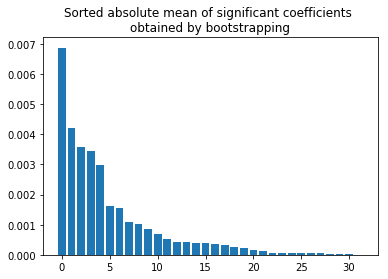

In [12]:
c_sig = []
for idx, c in enumerate(ci_boot):
    c_upper = np.percentile(c, 97.5)
    c_lower = np.percentile(c, 2.5)
    if c_upper<0 or c_lower>0:
        c_sig.append( (X_train_impute.columns[idx], c) )

c_sig_sorted = sorted(c_sig, key=lambda x: np.abs(np.mean(x[1])), reverse=True)

fig, ax = plt.subplots(1, 1)
ax.bar([i for i in range(len(c_sig_sorted))], [np.abs(np.mean(c[1])) for c in c_sig_sorted])
ax.set_title("Sorted absolute mean of significant coefficients \nobtained by bootstrapping")

In [14]:
print("Top 8 significant coefficients and their absolute mean:")
for i in range(8):
    print(c_sig_sorted[i][0], " / ", np.abs(np.mean(c_sig_sorted[i][1])))

Top 8 significant coefficients and their absolute mean:
RAVLT_perc_forgetting_bl  /  0.00687780321002
ADAS13_bl  /  0.00422216992966
FAQ_bl  /  0.00358037961312
RAVLT_immediate_bl  /  0.00345922012695
ADAS11_bl  /  0.00297374528912
MOCA_bl  /  0.00160579440866
MMSE_bl  /  0.00154002090564
CDRSB_bl  /  0.00109141210525


## Meta-Model

#### Remove-All-NaN Dataset